In [2]:
import os
import pandas as pd
import numpy as np

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, LabelBinarizer, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer


In [3]:
SOURCE_DIR = 'C:\\Users\\aarpi\\Documents\\Coding Projects\\OMSCS\\ML\\classification'
DATA_PATH = "/data"

CREDIT_NAME = "crx.data"
BREAST_CANCER_NAME = "breast-cancer-wisconsin.csv"

CREDIT_COLS = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15", "A16"]
BREAST_COLS = ["ID", "ClumpThickness", "UniformityCellSize", "UniformityCellShape", "MarginalAdhesion", 
               "SingleEpithelialCellSize", "BareNuclei" , "BlandChromatin", "NormalNucleoli", "Mitoses", "Class"]

In [4]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names, return_pd = False, flat = False):
        self.attribute_names = attribute_names
        self.return_pd = return_pd
        self.flat = flat
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if (self.flat):
            return X[self.attribute_names].values.flat
        
        if self.return_pd:
            return X[self.attribute_names]
        else: 
            return X[self.attribute_names].values
        
class MultipleOneHot(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return pd.get_dummies(X).values

class Converter(BaseEstimator, TransformerMixin):
    def __init__(self, src, dst, new_type =  None):
        self.dst = dst
        self.src = src
        self.new_type = new_type
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X[X == self.src] = self.dst
        if self.new_type is not None:
            return X.astype(self.new_type)
        else:
            return X

def my_join(list_of_dirs):
    return "/".join(list_of_dirs)[1:]

def load_data(cols, name, path = DATA_PATH):
    csv_path = my_join((path, name))
    print(csv_path)
    return pd.read_csv(csv_path, names=cols, header=None)

In [5]:
def get_credit_pipeline():
    
    cat_attributes = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 
           'A12', 'A13']
    num_attributes = ['A2', 'A3', 'A8', "A11", 'A14', 'A15']
    target_attributes = ["A16"]

    cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attributes, return_pd=True)),
        ('multiple_one_hot', MultipleOneHot()),
    ])

    num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attributes)),
        ('converter', Converter("?", "Nan", new_type="float")),
        ('imputer', SimpleImputer(strategy="median")),
        ('scaler', StandardScaler()),
    ])

    full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
        ])

    return full_pipeline

In [6]:
def get_breast_cancer_pipeline():

    num_attributes = ['ClumpThickness', 'UniformityCellSize', 'UniformityCellShape',
           'MarginalAdhesion', 'SingleEpithelialCellSize', 'BareNuclei',
           'BlandChromatin', 'NormalNucleoli', 'Mitoses']


    num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attributes)),
        ('converter', Converter("?", "Nan", new_type="float")),
        ('imputer', SimpleImputer(strategy="median")),
        ('scaler', StandardScaler()),
    ])
    
    return num_pipeline

In [236]:
credit = load_data(CREDIT_COLS, CREDIT_NAME)
breast = load_data(BREAST_COLS, BREAST_CANCER_NAME)

data/crx.data
data/breast-cancer-wisconsin.csv


# Exploration

In [18]:
import matplotlib.pyplot as plt # Visuals

pd.set_option('display.max_columns', 500) 
plt.style.use('ggplot') # Using ggplot2 style visuals 



In [19]:
breast.head()

,ID,ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


([<matplotlib.axis.XTick at 0x1584ac97be0>,
 <a list of 2 Text xticklabel objects>)

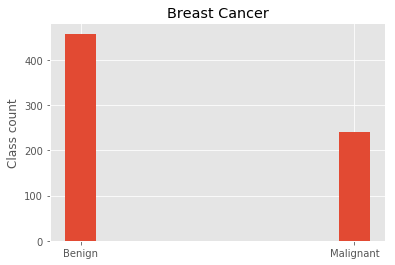

In [75]:
#Plotting the class distribution
breast["Class"][breast["Class"] == 4] = True
breast["Class"][breast["Class"] == 2] = False
plt.hist(breast["Class"])
plt.title("Breast Cancer")
plt.ylabel('Class count');
plt.xticks([0.05,0.95], ["Benign", "Malignant"])




C:\Users\aarpi\AppData\Local\conda\conda\envs\cv_proj\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\aarpi\AppData\Local\conda\conda\envs\cv_proj\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


([<matplotlib.axis.XTick at 0x15849086e80>,
 <a list of 2 Text xticklabel objects>)

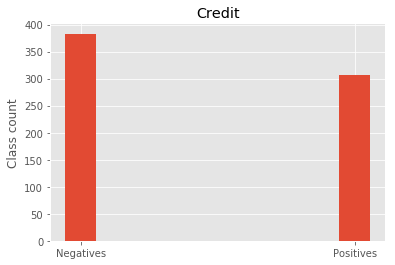

In [68]:
credit["A16"][credit["A16"] == "+"] = 1
credit["A16"][credit["A16"] == "-"] = 0
plt.hist(credit["A16"].values.astype("int"))
plt.title("Credit")
plt.ylabel('Class count');
plt.xticks([0.05,0.95], ["Negatives", "Positives"])

In [71]:
import seaborn as sns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000158568CC320>,
      dtype=object)

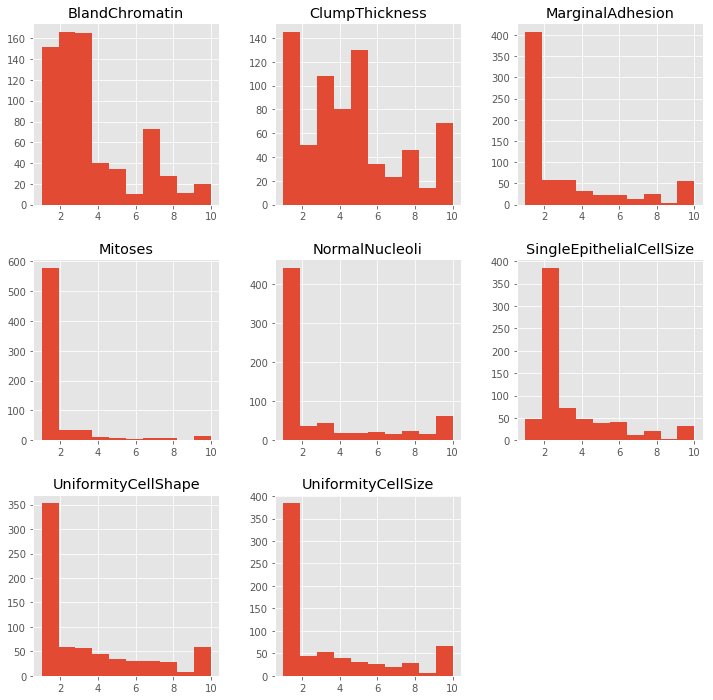

In [130]:
breast.drop(["Class", "ID"], axis = 1).hist(figsize = (12,12))

Class
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: ClumpThickness, dtype: object

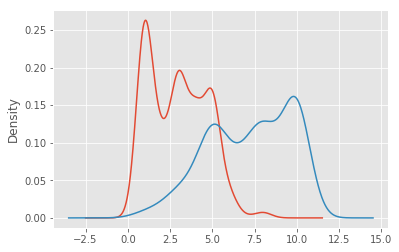

In [142]:
breast.groupby("Class").ClumpThickness.plot(kind='kde')

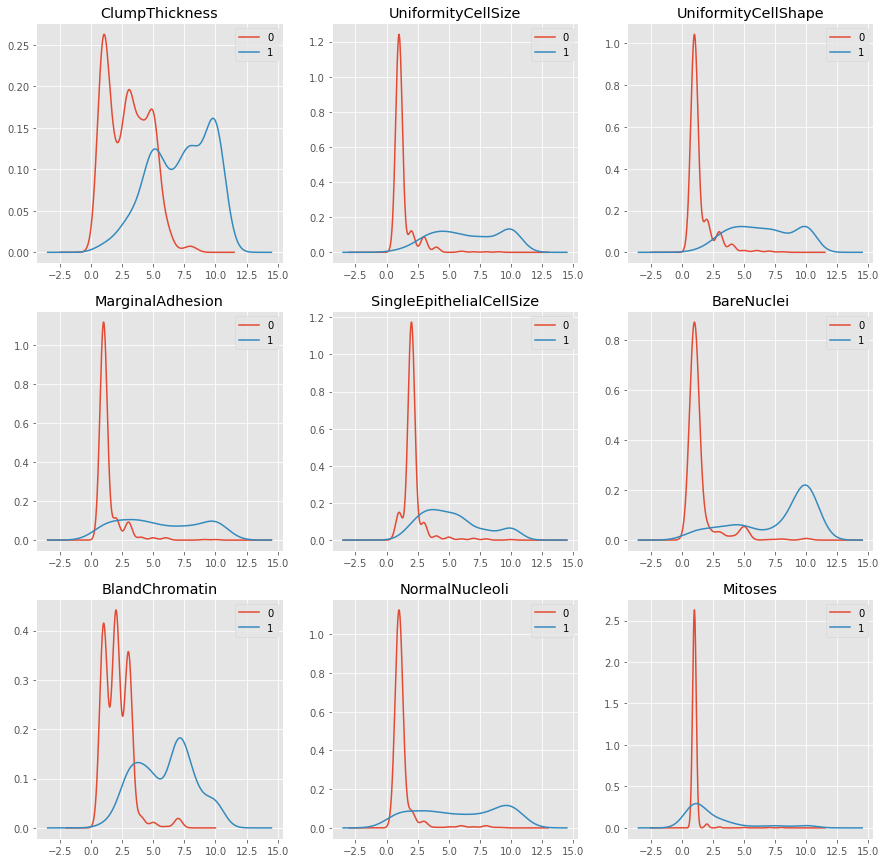

In [211]:
fig, axs = plt.subplots(figsize= (15,15),ncols=3, nrows=3)
axes = axs.flatten()
for i, feature in zip(range(9), ['ClumpThickness', 'UniformityCellSize', 'UniformityCellShape',
       'MarginalAdhesion', 'SingleEpithelialCellSize', 'BareNuclei',
       'BlandChromatin', 'NormalNucleoli', 'Mitoses']):
    breast.groupby("Class")[feature].plot(kind='kde', ax=axes[i], title=feature)
    axes[i].legend()
    axes[i].yaxis.label.set_visible(False)

In [251]:
breast.dtypes

ID                           int64
ClumpThickness               int64
UniformityCellSize           int64
UniformityCellShape          int64
MarginalAdhesion             int64
SingleEpithelialCellSize     int64
BareNuclei                  object
BlandChromatin               int64
NormalNucleoli               int64
Mitoses                      int64
Class                        int64
dtype: object

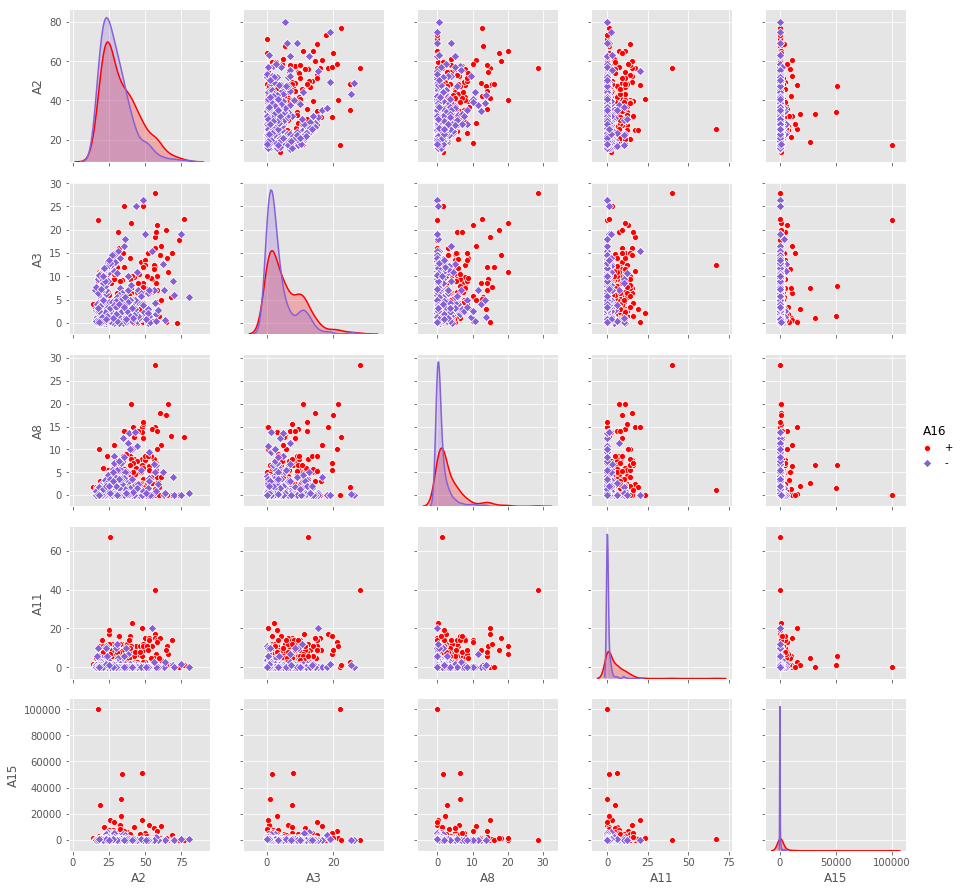

In [264]:
cols = ["A2", "A3", "A8", "A11", "A15"]

sns.pairplot(credit,
             x_vars = cols,
             y_vars = cols,
             hue = 'A16', 
             palette = ('Red', '#875FDB'), 
             markers=["o", "D"])